# Importing the Libraries and Dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics 

# Data Collection and Processing

In [2]:
# Loading the Car Price data from csv file and create Pandas DataFrame
car_data = pd.read_csv('CarPrice_Assignment.csv')

In [3]:
# print 5 rows of dataset.
car_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
# Checking the number of rows and columns
car_data.shape

(205, 26)

In [5]:
# print the information of dataset
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
# find the number of missing values in each column
car_data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

# Checking the distribution of Categorical data

In [7]:
car_data.fueltype.value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [8]:
car_data.carbody.value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

In [9]:
car_data.cylindernumber.value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64

# Encoding the Categorical data

In [10]:
car_data.replace({"fueltype":{"gas":0,"diesel":1}},inplace=True)
car_data.replace({"carbody":{"sedan":0,"hatchback":1,"wagon":2,"hardtop":3,"convertible":4}},inplace=True)
car_data.replace({"doornumber":{"two":0,"four":1}},inplace=True)
car_data.replace({"cylindernumber":{"four":0,"six":1,"five":2,"eight":3,"two":4,"three":5,"twelve":6}},inplace=True)

In [11]:
car_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,0,std,0,4,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,0,std,0,4,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,0,std,0,1,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,0,std,1,0,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,0,std,1,0,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# Data Visualisation

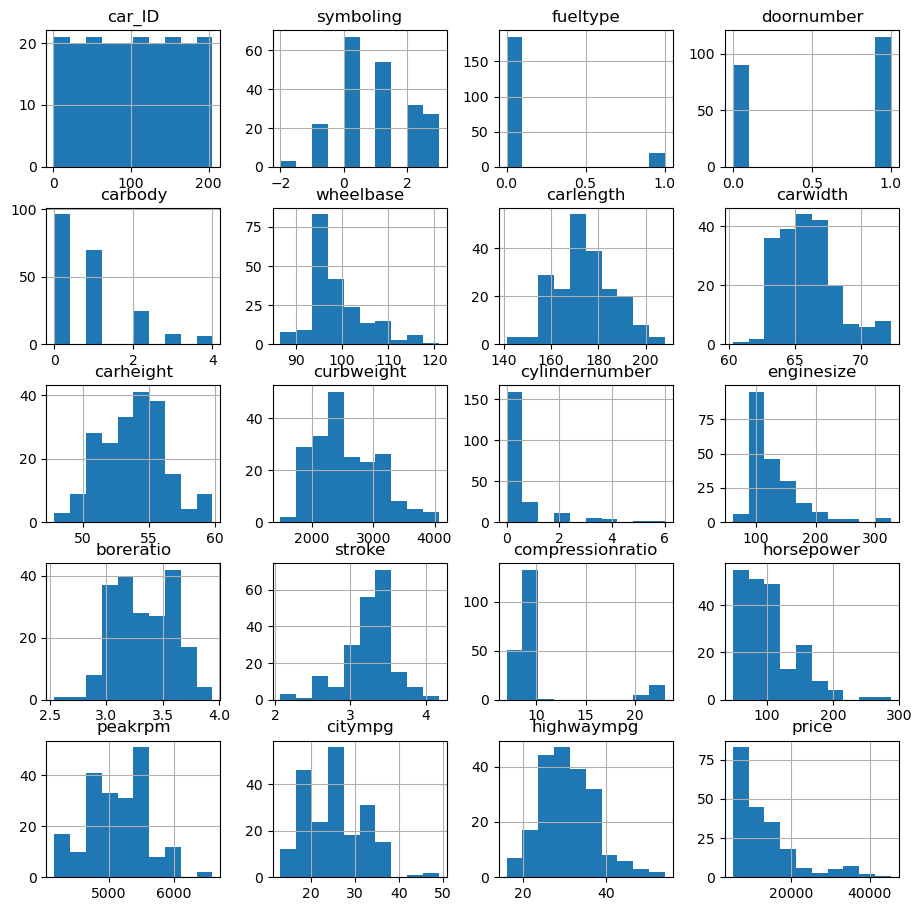

In [12]:
car_data.hist(figsize=(11,11));

Text(0.5, 1.0, 'Correlation Heatmap')

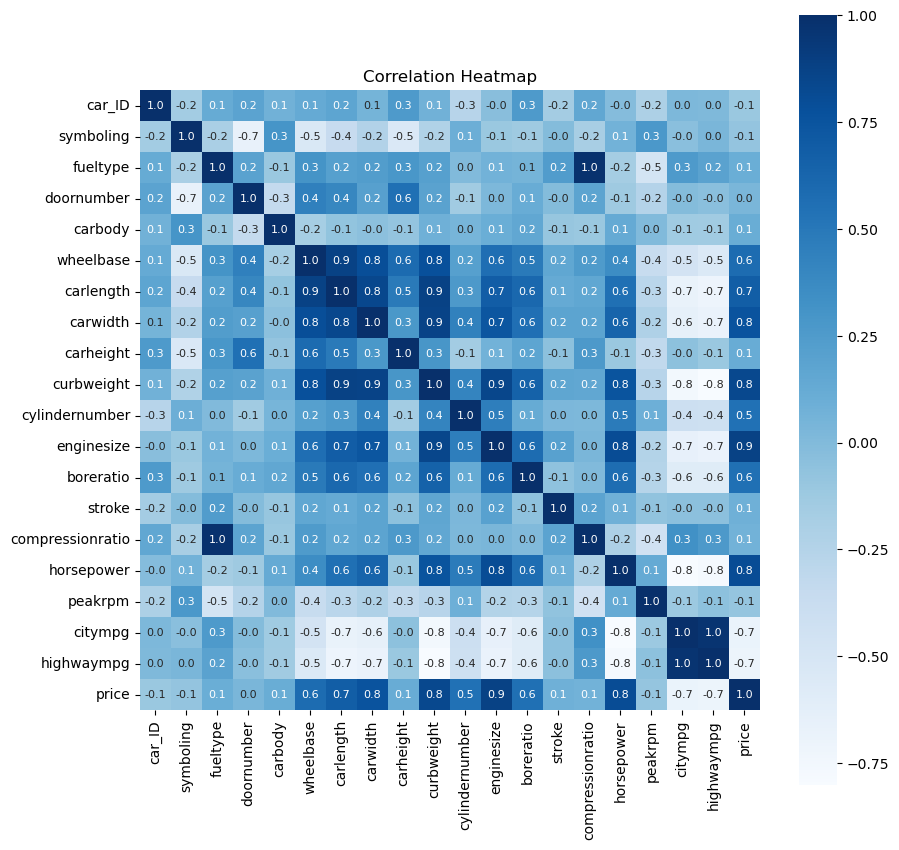

In [13]:
# For understand the correlation between the columns, we use heatmaps
plt.figure(figsize = (10,10))
sb.heatmap(car_data.corr(), cbar = True, square = True, fmt = '.1f', annot = True, 
           annot_kws = {'size':8}, cmap = 'Blues').set_title('Correlation Heatmap')

# Splitting the data and Target

In [14]:
x = car_data.drop(["CarName","aspiration","drivewheel","enginelocation","fuelsystem","price","enginetype"],axis=1)
y = car_data["price"]

In [15]:
x

,car_ID,symboling,fueltype,doornumber,carbody,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,1,3,0,0,4,88.6,168.8,64.1,48.8,2548,0,130,3.47,2.68,9.0,111,5000,21,27
1,2,3,0,0,4,88.6,168.8,64.1,48.8,2548,0,130,3.47,2.68,9.0,111,5000,21,27
2,3,1,0,0,1,94.5,171.2,65.5,52.4,2823,1,152,2.68,3.47,9.0,154,5000,19,26
3,4,2,0,1,0,99.8,176.6,66.2,54.3,2337,0,109,3.19,3.40,10.0,102,5500,24,30
4,5,2,0,1,0,99.4,176.6,66.4,54.3,2824,2,136,3.19,3.40,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,0,1,0,109.1,188.8,68.9,55.5,2952,0,141,3.78,3.15,9.5,114,5400,23,28
201,202,-1,0,1,0,109.1,188.8,68.8,55.5,3049,0,141,3.78,3.15,8.7,160,5300,19,25
202,203,-1,0,1,0,109.1,188.8,68.9,55.5,3012,1,173,3.58,2.87,8.8,134,5500,18,23
203,204,-1,1,1,0,109.1,188.8,68.9,55.5,3217,1,145,3.01,3.40,23.0,106,4800,26,27


In [16]:
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

# Splitting the data into Training data and Test data

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=2)

# Model Training 

In [18]:
model = LinearRegression()

In [19]:
model.fit(x_train, y_train)

LinearRegression()

# Model Evaluation

In [20]:
# Prediction on Training data
training_data_prediction = model.predict(x_train)

In [21]:
# R squared Error
error_score = metrics.r2_score(y_train,training_data_prediction)
print("R2-squared error for training data : ",error_score)

R2-squared error for training data :  0.87240921279194


# Visualize the Actual Prices and Predicted prices

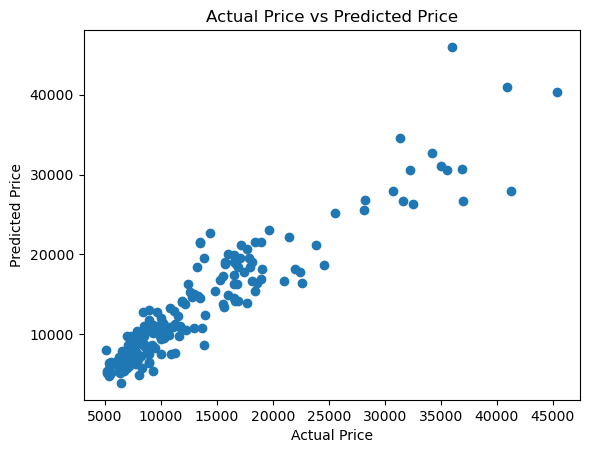

In [22]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [23]:
# Prediction on Test data
test_data_prediction = model.predict(x_test)

In [24]:
#R squared Error
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R2-squared error for test data : ",error_score)

R2-squared error for test data :  0.8378142169328606


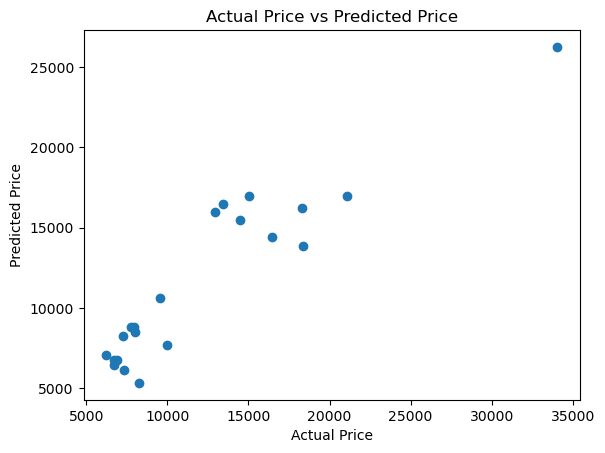

In [25]:
plt.scatter(y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()